In [11]:
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('C:/Users/imton/Documents/SEM 6 NOTES/Quantum Computing Programs/stock.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

         Date    Open    High     Low    Last   Close      Total  Turnover 
0  2018-10-08  208.00  222.25  206.85  216.00  215.15  4642146.0   10062.83
1  2018-10-05  217.00  218.60  205.90  210.25  209.20  3519515.0    7407.06
2  2018-10-04  223.50  227.80  216.15  217.25  218.20  1728786.0    3815.79
3  2018-10-03  230.00  237.50  225.75  226.45  227.60  1708590.0    3960.27
4  2018-10-01  234.55  234.60  221.05  230.30  230.90  1534749.0    3486.05

 Shape of the data:
(1235, 8)


In [12]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [13]:
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(987, 2)


In [14]:
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(248, 2)


In [15]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [16]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
104.51415465984348


In [17]:
import matplotlib.pyplot as plt

C:\Users\imton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\imton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


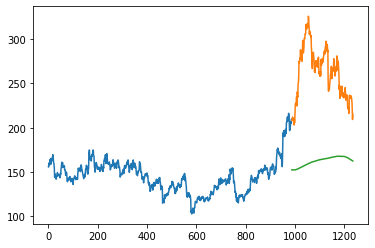

In [18]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])